In [10]:
R.version

               _                           
platform       x86_64-conda_cos6-linux-gnu 
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          3                           
minor          6.1                         
year           2019                        
month          07                          
day            05                          
svn rev        76782                       
language       R                           
version.string R version 3.6.1 (2019-07-05)
nickname       Action of the Toes          

In [11]:
library("dplyr")
library("glue")
library("stringr")
library("rlist")
library("data.table")
library("readr")
library("stringi")
library("swat")

In [12]:
source("UtilsRCAS.R")

# Connection a l'environnement SAS Viya

In [13]:
cashost <- '192.168.1.50'
casuser <- 'sasdemo'
#caspwd <- 'Lprzwb31CA'

#cashost <- 'controller'
#casuser <- 'sebastien'
#caspwd <- 'sebastien2020'

conn <- swat::CAS(cashost, 5570, username=casuser)

# Activate metric tracing and other session parameters
out <- cas.sessionProp.setSessOpt(conn, metrics=TRUE, timeout=1800, caslib='casuser')

NOTE: Connecting to CAS and generating CAS action functions for loaded
      action sets...
NOTE: To generate the functions with signatures (for tab completion), set 
      options(cas.gen.function.sig=TRUE).
NOTE: 'CASUSER(sasdemo)' is now the active caslib.
NOTE: L'action 'sessionProp.setSessOpt' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,017107 secondes
NOTE:       temps UC                0,016978 secondes (99,25 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 362,78 Ko (0,00 %)


In [14]:
actionsets <- c('fedsql','aggregation')
for(i in actionsets){
    loadActionSet(conn, i)
}

NOTE: Executing action 'builtins.loadActionSet'.
NOTE: Added action set 'fedsql'.
NOTE: L'action 'builtins.loadActionSet' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,068936 secondes
NOTE:       temps UC                0,021262 secondes (30,84 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 267,06 Ko (0,00 %)
NOTE: Executing action 'builtins.actionSetInfo'.
NOTE: L'action 'builtins.actionSetInfo' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,008375 secondes
NOTE:       temps UC                0,004586 secondes (54,76 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 320,09 Ko (0,00 %)
NOTE: Executing action 'builtins.listActions'.
NOTE: Informations pour l'ensemble d'actions 'fedSql':
NOTE:    fedSql
NOTE:       execDirect - Submits a SAS FedSQL language statem

In [15]:
cas.builtins.serverStatus(conn)

NOTE: Executing action 'builtins.serverStatus'.
NOTE: Grid node action status report: 1 nodes, 34 total actions executed.
NOTE: L'action 'builtins.serverStatus' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,017094 secondes
NOTE:       temps UC                0,006474 secondes (37,87 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 316,28 Ko (0,00 %)


$About
$About$CAS
[1] "Cloud Analytic Services"

$About$Version
[1] "3.05"

$About$VersionLong
[1] "V.03.05M0P11062019"

$About$Copyright
[1] "Copyright © 2014-2018 SAS Institute Inc. All Rights Reserved."

$About$ServerTime
[1] "2020-04-24T09:16:44Z"

$About$System
$About$System$Hostname
[1] "viya35.local.fr"

$About$System$`OS Name`
[1] "Linux"

$About$System$`OS Family`
[1] "LIN X64"

$About$System$`OS Release`
[1] "3.10.0-1062.el7.x86_64"

$About$System$`OS Version`
[1] "#1 SMP Wed Aug 7 18:08:02 UTC 2019"

$About$System$`Model Number`
[1] "x86_64"

$About$System$`Linux Distribution`
[1] "CentOS Linux release 7.6.1810 (Core)"


$About$license
$About$license$site
[1] "SAS_VIYA_DATASCIENCE"

$About$license$siteNum
[1] 70180938

$About$license$expires
[1] "19 février 2021 00 h 00"

$About$license$gracePeriod
[1] 45

$About$license$warningPeriod
[1] 45

$About$license$maxCPUs
[1] 9999



$server
  nodes actions
1     1      34

$nodestatus
             name       role uptime running stalled
1 viya35.local.fr controller  3.327       0       0

## Defini une librairie CAS pointant sur le repertoire contenant tous les fichiers CSV en entree. On definie la source en DNFS, cela signifie que la lecture et l'ecriture des fichiers se fera en multitheading et multi noeud automatiquement. Les formats de fichiers supportes actuellement sur ce mode sont : CSV, PARQUET et SASHDAT.

In [16]:
HeureDebut <- Sys.time()

cas.table.addCaslib(conn,name="mycaslib", path="/data/data/BDF_SMALL_DB", dataSource={srcType="dnfs"})
#cas.table.addCaslib(conn,name="mycaslib", path="/SAS/BDF", dataSource={srcType="dnfs"})
out <- cas.sessionProp.setSessOpt(conn,caslib='casuser')

NOTE: Executing action 'table.addCaslib'.
NOTE: 'mycaslib' is now the active caslib.
NOTE: Cloud Analytic Services added the caslib 'mycaslib'.
NOTE: L'action 'table.addCaslib' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,004761 secondes
NOTE:       temps UC                0,004631 secondes (97,27 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 741,13 Ko (0,00 %)


Name,Type,Description,Path,Definition,Subdirs,Local,Active,Personal,Hidden,Transient
mycaslib,DNFS,,/data/data/BDF_SMALL_DB/,,0,1,1,0,0,0


NOTE: Executing action 'sessionProp.setSessOpt'.
NOTE: 'CASUSER(sasdemo)' is now the active caslib.
NOTE: L'action 'sessionProp.setSessOpt' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,002462 secondes
NOTE:       temps UC                0,002023 secondes (82,17 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 265,13 Ko (0,00 %)


# Chargement en memoire de tous les fichiers CSV en entree (referentiel et agregats) pour l'utilisation ulterieure.

In [17]:
import_all_csv_in_memory(conn, 'mycaslib','casuser')

NOTE: Executing action 'table.fileInfo'.
NOTE: L'action 'table.fileInfo' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,003360 secondes
NOTE:       temps UC                0,003156 secondes (93,93 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 703,06 Ko (0,00 %)


[1] "D1"


NOTE: Executing action 'table.dropTable'.
NOTE: L'action 'table.dropTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,000826 secondes
NOTE:       temps UC                0,000591 secondes (71,55 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 281,03 Ko (0,00 %)
NOTE: Executing action 'table.loadTable'.
NOTE: Cloud Analytic Services made the DNFS file D1.csv available as table D1 in caslib CASUSER(sasdemo).
NOTE: L'action 'table.loadTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              1,668531 secondes
NOTE:       temps UC                6,484963 secondes (388,66 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 165,59 Mo (0,52 %)


[1] "D2"


NOTE: Executing action 'table.dropTable'.
NOTE: L'action 'table.dropTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,000853 secondes
NOTE:       temps UC                0,000624 secondes (73,15 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 299,41 Ko (0,00 %)
NOTE: Executing action 'table.loadTable'.
NOTE: Cloud Analytic Services made the DNFS file D2.csv available as table D2 in caslib CASUSER(sasdemo).
NOTE: L'action 'table.loadTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,375177 secondes
NOTE:       temps UC                1,341192 secondes (357,48 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 148,14 Mo (0,46 %)


[1] "D3"


NOTE: Executing action 'table.dropTable'.
NOTE: L'action 'table.dropTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,000692 secondes
NOTE:       temps UC                0,000558 secondes (80,64 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 299,41 Ko (0,00 %)
NOTE: Executing action 'table.loadTable'.
NOTE: Cloud Analytic Services made the DNFS file D3.csv available as table D3 in caslib CASUSER(sasdemo).
NOTE: L'action 'table.loadTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              1,245800 secondes
NOTE:       temps UC                6,195510 secondes (497,31 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 164,00 Mo (0,51 %)


[1] "D"


NOTE: Executing action 'table.dropTable'.
NOTE: L'action 'table.dropTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,000730 secondes
NOTE:       temps UC                0,000584 secondes (80,00 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 299,41 Ko (0,00 %)
NOTE: Executing action 'table.loadTable'.
NOTE: Cloud Analytic Services made the DNFS file D.csv available as table D in caslib CASUSER(sasdemo).
NOTE: L'action 'table.loadTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              1,881551 secondes
NOTE:       temps UC                8,431969 secondes (448,14 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 174,48 Mo (0,55 %)


[1] "F"


NOTE: Executing action 'table.dropTable'.
NOTE: L'action 'table.dropTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,001028 secondes
NOTE:       temps UC                0,000707 secondes (68,77 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 283,56 Ko (0,00 %)
NOTE: Executing action 'table.loadTable'.
NOTE: Cloud Analytic Services made the DNFS file F.csv available as table F in caslib CASUSER(sasdemo).
NOTE: L'action 'table.loadTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,128558 secondes
NOTE:       temps UC                0,121457 secondes (94,48 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 131,26 Mo (0,41 %)


[1] "O"


NOTE: Executing action 'table.dropTable'.
NOTE: L'action 'table.dropTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,001930 secondes
NOTE:       temps UC                0,001215 secondes (62,95 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 281,03 Ko (0,00 %)
NOTE: Executing action 'table.loadTable'.
NOTE: Cloud Analytic Services made the DNFS file O.csv available as table O in caslib CASUSER(sasdemo).
NOTE: L'action 'table.loadTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              1,608445 secondes
NOTE:       temps UC                7,015091 secondes (436,14 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 168,61 Mo (0,53 %)


[1] "P"


NOTE: Executing action 'table.dropTable'.
NOTE: L'action 'table.dropTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,001633 secondes
NOTE:       temps UC                0,001335 secondes (81,75 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 281,03 Ko (0,00 %)
NOTE: Executing action 'table.loadTable'.
NOTE: Cloud Analytic Services made the DNFS file P.csv available as table P in caslib CASUSER(sasdemo).
NOTE: L'action 'table.loadTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,474480 secondes
NOTE:       temps UC                2,122640 secondes (447,36 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 156,47 Mo (0,49 %)


[1] "U1"


NOTE: Executing action 'table.dropTable'.
NOTE: L'action 'table.dropTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,000905 secondes
NOTE:       temps UC                0,000728 secondes (80,44 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 283,56 Ko (0,00 %)
NOTE: Executing action 'table.loadTable'.
NOTE: Cloud Analytic Services made the DNFS file U1.csv available as table U1 in caslib CASUSER(sasdemo).
NOTE: L'action 'table.loadTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              1,002005 secondes
NOTE:       temps UC                4,651613 secondes (464,23 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 161,31 Mo (0,50 %)


[1] "U2"


NOTE: Executing action 'table.dropTable'.
NOTE: L'action 'table.dropTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,001599 secondes
NOTE:       temps UC                0,001214 secondes (75,92 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 281,03 Ko (0,00 %)
NOTE: Executing action 'table.loadTable'.
NOTE: Cloud Analytic Services made the DNFS file U2.csv available as table U2 in caslib CASUSER(sasdemo).
NOTE: L'action 'table.loadTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              1,042795 secondes
NOTE:       temps UC                4,089252 secondes (392,14 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 161,42 Mo (0,50 %)


[1] "U3"


NOTE: Executing action 'table.dropTable'.
NOTE: L'action 'table.dropTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,001332 secondes
NOTE:       temps UC                0,000579 secondes (43,47 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 281,03 Ko (0,00 %)
NOTE: Executing action 'table.loadTable'.
NOTE: Cloud Analytic Services made the DNFS file U3.csv available as table U3 in caslib CASUSER(sasdemo).
NOTE: L'action 'table.loadTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,321591 secondes
NOTE:       temps UC                1,079586 secondes (335,70 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 147,02 Mo (0,46 %)


[1] "Z"


NOTE: Executing action 'table.dropTable'.
NOTE: L'action 'table.dropTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,000678 secondes
NOTE:       temps UC                0,000573 secondes (84,51 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 281,03 Ko (0,00 %)
NOTE: Executing action 'table.loadTable'.
NOTE: Cloud Analytic Services made the DNFS file Z.csv available as table Z in caslib CASUSER(sasdemo).
NOTE: L'action 'table.loadTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,445888 secondes
NOTE:       temps UC                1,506852 secondes (337,94 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 148,13 Mo (0,46 %)


[1] "TablePaysZone"


NOTE: Executing action 'table.dropTable'.
NOTE: L'action 'table.dropTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,001336 secondes
NOTE:       temps UC                0,000798 secondes (59,73 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 281,03 Ko (0,00 %)
NOTE: Executing action 'table.loadTable'.
NOTE: Cloud Analytic Services made the DNFS file TablePaysZone.csv available as table TABLEPAYSZONE in caslib CASUSER(sasdemo).
NOTE: L'action 'table.loadTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,050436 secondes
NOTE:       temps UC                0,046209 secondes (91,62 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 129,51 Mo (0,40 %)


[1] "PlanAgregation"


NOTE: Executing action 'table.dropTable'.
NOTE: L'action 'table.dropTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,001560 secondes
NOTE:       temps UC                0,000463 secondes (29,68 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 281,03 Ko (0,00 %)
NOTE: Executing action 'table.loadTable'.
NOTE: Cloud Analytic Services made the DNFS file PlanAgregation.csv available as table PLANAGREGATION in caslib CASUSER(sasdemo).
NOTE: L'action 'table.loadTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,078094 secondes
NOTE:       temps UC                0,075295 secondes (96,42 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 129,71 Mo (0,41 %)


In [18]:
cas.table.tableInfo(conn,caslib="casuser")

NOTE: Executing action 'table.tableInfo'.
NOTE: L'action 'table.tableInfo' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,005580 secondes
NOTE:       temps UC                0,005308 secondes (95,13 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 720,34 Ko (0,00 %)


Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,...,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
D1,216482,8,0,utf-8,2020-04-24T11:16:45+02:00,2020-04-24T11:16:45+02:00,2020-04-24T11:16:45+02:00,UTF8,1903339005,...,0,0,0,D1.csv,mycaslib,0,sasdemo,,2020-04-06T15:46:33+02:00,1901799993
D2,64725,8,0,utf-8,2020-04-24T11:16:47+02:00,2020-04-24T11:16:47+02:00,2020-04-24T11:16:47+02:00,UTF8,1903339007,...,0,0,0,D2.csv,mycaslib,0,sasdemo,,2020-04-06T15:46:51+02:00,1901800011
D3,181969,8,0,utf-8,2020-04-24T11:16:48+02:00,2020-04-24T11:16:48+02:00,2020-04-24T11:16:48+02:00,UTF8,1903339008,...,0,0,0,D3.csv,mycaslib,0,sasdemo,,2020-04-06T15:47:37+02:00,1901800057
D,320389,8,0,utf-8,2020-04-24T11:16:49+02:00,2020-04-24T11:16:49+02:00,2020-04-24T11:16:49+02:00,UTF8,1903339009,...,0,0,0,D.csv,mycaslib,0,sasdemo,,2020-04-06T15:49:03+02:00,1901800143
F,5974,8,0,utf-8,2020-04-24T11:16:51+02:00,2020-04-24T11:16:51+02:00,2020-04-24T11:16:51+02:00,UTF8,1903339011,...,0,0,0,F.csv,mycaslib,0,sasdemo,,2020-04-06T15:49:06+02:00,1901800146
O,283449,8,0,utf-8,2020-04-24T11:16:52+02:00,2020-04-24T11:16:52+02:00,2020-04-24T11:16:52+02:00,UTF8,1903339012,...,0,0,0,O.csv,mycaslib,0,sasdemo,,2020-04-06T15:50:16+02:00,1901800216
P,95308,8,0,utf-8,2020-04-24T11:16:54+02:00,2020-04-24T11:16:54+02:00,2020-04-24T11:16:54+02:00,UTF8,1903339014,...,0,0,0,P.csv,mycaslib,0,sasdemo,,2020-04-06T15:50:38+02:00,1901800238
U1,148350,8,0,utf-8,2020-04-24T11:16:54+02:00,2020-04-24T11:16:54+02:00,2020-04-24T11:16:54+02:00,UTF8,1903339014,...,0,0,0,U1.csv,mycaslib,0,sasdemo,,2020-04-06T15:51:17+02:00,1901800277
U2,133907,8,0,utf-8,2020-04-24T11:16:56+02:00,2020-04-24T11:16:56+02:00,2020-04-24T11:16:56+02:00,UTF8,1903339016,...,0,0,0,U2.csv,mycaslib,0,sasdemo,,2020-04-06T15:51:52+02:00,1901800312
U3,60779,8,0,utf-8,2020-04-24T11:16:57+02:00,2020-04-24T11:16:57+02:00,2020-04-24T11:16:57+02:00,UTF8,1903339017,...,0,0,0,U3.csv,mycaslib,0,sasdemo,,2020-04-06T15:52:09+02:00,1901800329


## Concatenation totale de toutes les tables d'agregat en mémoire pour former une table nommee AGGTTECATEGORIE

In [19]:
cas_concat_all_tables(conn, "casuser","casuser","AGGTTECATEGORIE")
table_AggregationMensuelleTouteCategorie <- defCasTable(conn, tablename='AGGTTECATEGORIE', caslib='casuser')
nrow(table_AggregationMensuelleTouteCategorie)

NOTE: Executing action 'table.tableInfo'.
NOTE: L'action 'table.tableInfo' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,005520 secondes
NOTE:       temps UC                0,005168 secondes (93,62 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 714,81 Ko (0,00 %)
NOTE: Executing action 'table.dropTable'.
NOTE: L'action 'table.dropTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,001620 secondes
NOTE:       temps UC                0,001369 secondes (84,51 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 281,03 Ko (0,00 %)
NOTE: Executing action 'dataStep.runCode'.
NOTE: L'action 'dataStep.runCode' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,505746 secondes
NOTE:       temps UC                2,065581 secondes (408,42 %)
NOTE: 

[1] 1576201

## Produire la repartition en nombre d'enregistrements par categorie a partir de l'agregation faite en memoire par le moteur CAS sur la table globale AGGTTECATEGORIE et la recuperation de ces agregats en entree de la fonction PIE de R

NOTE: Executing action 'simple.freq'.
NOTE: L'action 'simple.freq' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,171757 secondes
NOTE:       temps UC                1,177043 secondes (685,30 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 3,90 Mo (0,01 %)


casLib,Name,Rows,Columns
CASUSER(sasdemo),AGGTTECATEGORIE_freq,11,5


NOTE: Executing action 'table.fetch'.
NOTE: L'action 'table.fetch' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,002015 secondes
NOTE:       temps UC                0,001969 secondes (97,72 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 2,13 Mo (0,01 %)


$Fetch
   _Index_  _Column_ _Charvar_ _Fmtvar_ _Level_ _Frequency_
1        1 tablename         D        D       7      320389
2        2 tablename         O        O       5      283449
3        3 tablename        D1       D1       9      216482
4        4 tablename        D3       D3       4      181969
5        5 tablename        U1       U1      11      148350
6        6 tablename        U2       U2       1      133907
7        7 tablename         P        P      10       95308
8        8 tablename         Z        Z       3       64869
9        9 tablename        D2       D2       8       64725
10      10 tablename        U3       U3       2       60779
11      11 tablename         F        F       6        5974



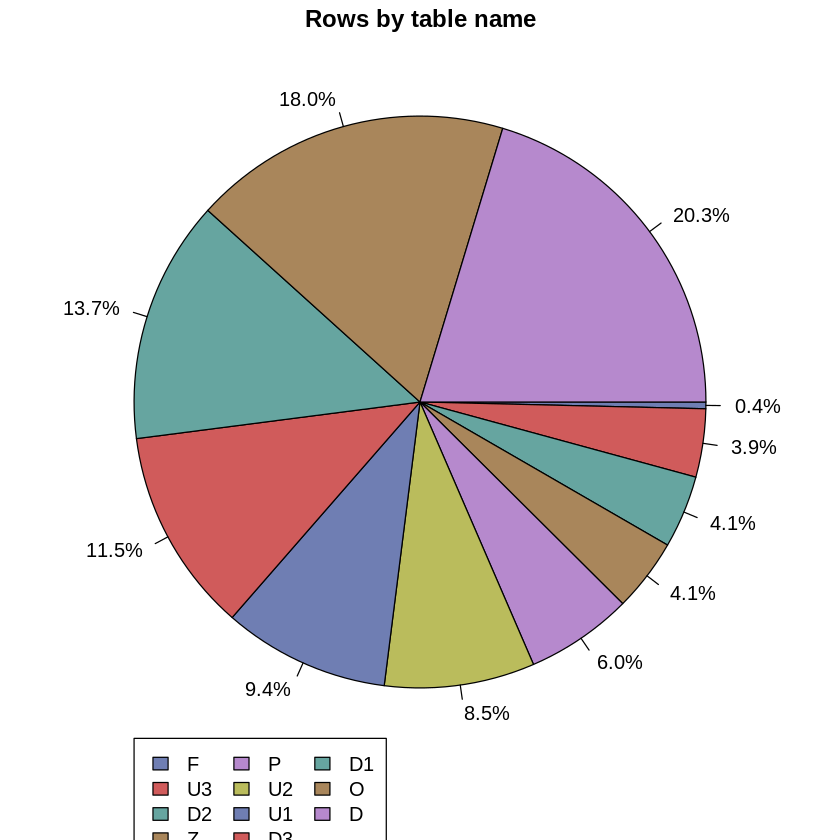

In [20]:
cas.simple.freq(conn, inputs = c("tablename"),table = c(name = "AGGTTECATEGORIE"),casout = c(name = "AGGTTECATEGORIE_freq", replace = TRUE)) 
res <- cas.table.fetch(conn, table = "AGGTTECATEGORIE_freq", sortBy = list(list(name = "_Frequency_",order = "descending")))
print(res)
piedata <- res$Fetch                                              # 
names(piedata) <- gsub("_", "", names(piedata))
piedata <- piedata[order(piedata$Frequency),]
total <- sum(piedata$Frequency)
piedata$Percent <- scales::percent(piedata$Frequency / total)
fillcolors = c("#6F7EB3", "#D05B5B", "#66A5A0", "#A9865B","#B689CD", "#BABC5C")
par(mar = c(3, 0, 1.5, 0), xpd=TRUE)
pie(piedata$Frequency,labels = piedata$Percent, col=fillcolors, radius=0.85, clockwise=TRUE, init.angle=0, main="Rows by table name")
legend(x=-0.85, y=-1, horiz = FALSE, piedata$Charvar, fill = fillcolors, ncol=3)

## Declaration des table CAS en tant qu'objet de type CASTable en R

In [21]:
table_pays_zone <- defCasTable(conn, tablename='TABLEPAYSZONE', caslib='casuser')
table_planAggregation <- defCasTable(conn, tablename='PLANAGREGATION', caslib='casuser')

NOTE: Executing action 'table.columnInfo'.
NOTE: L'action 'table.columnInfo' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,001264 secondes
NOTE:       temps UC                0,001218 secondes (96,36 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 826,44 Ko (0,00 %)
NOTE: Executing action 'table.columnInfo'.
NOTE: L'action 'table.columnInfo' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,003747 secondes
NOTE:       temps UC                0,003621 secondes (96,64 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 842,47 Ko (0,00 %)


# Code principal basé sur le programme R existant

## Fonction de traitement principal

In [22]:
traitement_principal <- function(freq, RevFin, PeriodeFin, planAggregation,ReferencePiZones, Repertoire, ConnectionSecureDB)
{
  Frequence <- freq
  HeureDebut <- Sys.time()
  An = as.numeric(ExtractString(PeriodeFin, 1, 4))
  print("ETAPE DATA: LECTURE TABLE PI_ZONE")
  print(Sys.time())
  TablePiZone <- recuperation_traitement_table_code_pays(ReferencePiZones, ConnectionSecureDB)
  #return(TablePiZone)
  print(" TAILLE TABLE TablePaysZone")
  print(dim(TablePiZone))
  print(Sys.time())
  print("LECTURE ET MISE EN FORME DES FICHIERS D'AGGREGATION CODE SERIE")
  print(Sys.time())
  # planAggregation <- "PlanAggregation.csv"
  planAgregationCodeSerie <- lecture_fichier_aggregation_codeSerie(planAggregation, connectionSecureDB)
  # # write_delim(planAgregationCodeSerie, "planAgregationCodeSerie.csv", delim=";")
  print(" TAILLE TABLE planAgregationCodeSerie")
  print(dim(planAgregationCodeSerie))
  print(Sys.time())
  print("JOINTURE PLAN D'AGGREGATION")
  PlanAggregationParametre <- parametrage_aggregation_code_serie(planAgregationCodeSerie, TablePiZone, freq)
  # # write_delim(PlanAggregationParametre, "PlanAggregationParametre.csv", delim=";")
  print("Taille plan d'agregation")
  print(dim(PlanAggregationParametre))
  print(names(PlanAggregationParametre))

  # Ecriture du dataframe de sortie en table CAS pour les futures jointures
  PlanAggregationParametreCAS <- as.casTable(ConnectionSecureDB, PlanAggregationParametre, casOut=list(caslib="casuser", name="PLANAGGPARAM",replace=TRUE))
  print(dim(PlanAggregationParametreCAS))
    
  print("ESTIMATION NOMBRE DE PERIODE ET DE DEBUT DE TRAITEMENT")
  result_nbperiode_moisdebut <- detection_nbPeriode_moisDebut(freq, RevFin, PeriodeFin)
  NbrePeriode <- result_nbperiode_moisdebut$nbper
  MoisDebut <- as.numeric(result_nbperiode_moisdebut$moisDebut)
  print(MoisDebut)
  
  rm(result_nbperiode_moisdebut)
  
  print("BOUCLE DU LES MOIS")

 # On supprime la table d'agregat finale si elle existe avant de la reconstruire de la boucle mensuelle suivante   
 cas.table.dropTable(conn, caslib='casuser', name='AGG_FINALE', quiet=TRUE)
    
  for(mois in MoisDebut:(MoisDebut+NbrePeriode-1))
  {
     print(paste0("     Mois debut ", MoisDebut))
     print(paste0("     Mois fin ", (MoisDebut+NbrePeriode-1)))
     print(paste0("     Mois en cours de traitement: ", mois))
     
     print(Sys.time())
     
     print("                      lecture")

     AggregationMensuelleTouteCategorie <- lecture_tables_aggregation(freq, Mois, RevFin, PeriodeFin, Repertoire, ConnectionSecureDB,'AGGTTECATEGORIE','AGG_MENS_TEMP')
     print("Taille table d'agregation")
     print(dim(AggregationMensuelleTouteCategorie))
     print(names(AggregationMensuelleTouteCategorie))
      
     TableIdMixte <- lecture_tables_mixte(freq, Mois, RevFin, PeriodeFin, Repertoire, ConnectionSecureDB,'AGGTTECATEGORIE','AGG_MIXTE')
     print(dim(TableIdMixte))
     print(names(TableIdMixte))
     print(Sys.time())
     
     print("PARAMETRAGE CODE SERIE") 
     
     print("APPLICATION PARAMETRAGE CODE SERIE") 
     
     AggregationCodeSerieFinaleMensuelle <- application_plan_parametrage_aggregation_code_serie_mensuel('AGG_MENS_TEMP', 'PLANAGGPARAM', ConnectionSecureDB,'AGG_MENS')
     print(names(AggregationCodeSerieFinaleMensuelle))
      
     # On ajoute la table mensuelle à la table globale finale
     cas_append2tables(conn, 'casuser', 'AGG_MENS', 'casuser', 'AGG_FINALE')
  }
}

## Definition des variables

In [23]:
Repertoire <- "AC156203"
RevFin<- "SD10"
PeriodeFin <- "2018Q4"
freq <- "Q"
planAggregation <- table_planAggregation
ReferencePiZones <- table_pays_zone
ConnectionSecureDB <- conn # Connexion securisee a la session CAS

In [24]:
traitement_principal(freq, RevFin, PeriodeFin, planAggregation,ReferencePiZones, Repertoire, ConnectionSecureDB)

[1] "ETAPE DATA: LECTURE TABLE PI_ZONE"
[1] "2020-04-24 11:17:07 CEST"
[1] "recuperation_traitement_table_code_pays monostream"
[1] "2020-04-24 11:17:07 CEST"


NOTE: Executing action 'table.fetch'.
NOTE: L'action 'table.fetch' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,312384 secondes
NOTE:       temps UC                0,312312 secondes (99,98 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 1,44 Mo (0,00 %)
Column 1 ['code_zone'] of item 2 is missing in item 1. Use fill=TRUE to fill with NA (NULL for list columns), or use.names=FALSE to ignore column names. use.names='check' (default from v1.12.2) emits this message and proceeds as if use.names=FALSE for  backwards compatibility. See news item 5 in v1.12.2 for options to control this message.


[1] "end recuperation_traitement_table_code_pays monostream"
[1] "2020-04-24 11:17:18 CEST"
[1] " TAILLE TABLE TablePaysZone"
[1] 445   3
[1] "2020-04-24 11:17:18 CEST"
[1] "LECTURE ET MISE EN FORME DES FICHIERS D'AGGREGATION CODE SERIE"
[1] "2020-04-24 11:17:18 CEST"
[1] "lecture_fichier_aggregation_codeSerie monostream"


NOTE: Executing action 'table.fetch'.
NOTE: L'action 'table.fetch' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,099106 secondes
NOTE:       temps UC                0,098856 secondes (99,75 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 1,20 Mo (0,00 %)


[1] " TAILLE TABLE planAgregationCodeSerie"
[1] 2697    3
[1] "2020-04-24 11:17:25 CEST"
[1] "JOINTURE PLAN D'AGGREGATION"
[1] "parametrage_aggregation_code_serie monostream"
[1] "2020-04-24 11:17:26 CEST"
[1] "Recuperation des positions et longueur parents dans les codes"
[1] "Recuperation des positions et longueur des parametres dans les codes"
[1] "2020-04-24 11:17:28 CEST"
[1] "Recuperation des positions et longueur des index dans les codes"
[1] "2020-04-24 11:17:29 CEST"
[1] "3 GB"
[1] "Creation des variables cd2_, cd3_, cd1_, refsec, countsec par decoupage des codes"
[1] "2020-04-24 11:17:30 CEST"
[1] "Modification conditionnelle des valeurs de code entree et code sortie"
[1] "2020-04-24 11:17:30 CEST"
[1] "Jointure de la table AggregationTable TablePiZone"
[1] 7125   20
 [1] "code_sortie"       "code_entree"       "formule"          
 [4] "enfants"           "parents"           "cle"              
 [7] "ind_"              "PositionEnfant"    "LongueurEnfant"   
[10] "PositionPar

Warning message in if (class(data) == "character") {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”NOTE: Executing action 'table.columnInfo'.
NOTE: L'action 'table.columnInfo' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,001185 secondes
NOTE:       temps UC                0,001130 secondes (95,36 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 834,84 Ko (0,00 %)
NOTE: Executing action 'simple.numRows'.
NOTE: L'action 'simple.numRows' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,000881 secondes
NOTE:       temps UC                0,000826 secondes (93,76 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 418,53 Ko (0,00 %)


[1] 2639427       3
[1] "ESTIMATION NOMBRE DE PERIODE ET DE DEBUT DE TRAITEMENT"
[1] "detection_nbPeriode_moisDebut monostream"
[1] 201812
[1] "BOUCLE DU LES MOIS"


NOTE: Executing action 'table.dropTable'.
NOTE: L'action 'table.dropTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,001582 secondes
NOTE:       temps UC                0,001340 secondes (84,70 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 284,56 Ko (0,00 %)


[1] "     Mois debut 201812"
[1] "     Mois fin 201812"
[1] "     Mois en cours de traitement: 201812"
[1] "2020-04-24 11:20:43 CEST"
[1] "                      lecture"
[1] "lecture_tables_aggregation monostream"
[1] "2020-04-24 11:20:43 CEST"
[1] "6 GB"
[1] "CHARGEMENT DES TABLES D'AGGREGATION, monostream"
[1] "2020-04-24 11:20:44 CEST"
[1] "TABLES AGREGATION LU DE LA TABLE CAS AGGTTECATEGORIE"


NOTE: Executing action 'fedSql.execDirect'.
NOTE: Table AGG_MENS_TEMP was created in caslib CASUSER(sasdemo) with 1576201 rows returned.
NOTE: L'action 'fedSql.execDirect' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              3,606137 secondes
NOTE:       temps UC                23,036509 secondes (638,81 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 38,50 Mo (0,12 %)


[1] "end lecture_tables_aggregation monostream"
[1] "2020-04-24 11:20:47 CEST"


NOTE: Executing action 'table.columnInfo'.
NOTE: L'action 'table.columnInfo' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,001467 secondes
NOTE:       temps UC                0,001255 secondes (85,55 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 841,34 Ko (0,00 %)


[1] "Taille table d'agregation"


NOTE: Executing action 'simple.numRows'.
NOTE: L'action 'simple.numRows' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,001298 secondes
NOTE:       temps UC                0,001181 secondes (90,99 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 455,59 Ko (0,00 %)


[1] 1576201       9
[1] "code"         "montant"      "OBS_STATUS"   "CONF_STATUS"  "Periode_deb" 
[6] "revision_deb" "Periode_fin"  "revision_fin" "tablename"   
[1] "lecture_tables_mixte monostream"
[1] "2020-04-24 11:20:48 CEST"
[1] "7 GB"
[1] "end lecture_tables_mixte monostream"
[1] "2020-04-24 11:20:48 CEST"
NULL
NULL
[1] "2020-04-24 11:20:48 CEST"
[1] "PARAMETRAGE CODE SERIE"
[1] "APPLICATION PARAMETRAGE CODE SERIE"
[1] "application_plan_parametrage_aggregation_code_serie_mensuel monostream"
[1] "2020-04-24 11:20:49 CEST"
[1] "2020-04-24 11:20:49 CEST"
[1] "Renomage de variables et traitement d'espace dans les chaines de caratere"
[1] "2020-04-24 11:20:49 CEST"
[1] "Preparation de la jointure des tables PlanAggregationParametre, AggregationMensuelleTouteCategorie"
[1] "2020-04-24 11:20:49 CEST"
[1] "Jointure des tables PlanAggregationParametre, AggregationMensuelleTouteCategorie"


NOTE: Executing action 'fedSql.execDirect'.
 
Methods for full query plan
----------------------------
Number of Joins Performed is : 1
        HashJoin (LEFT) 
          SeqScan from CASUSER(sasdemo).AGG_MENS_TEMP 
          SeqScan from CASUSER(sasdemo).PLANAGGPARAM 
 
Methods for stage 1
--------------------
        HashJoin (LEFT) 
          SeqScan from CASUSER(sasdemo).AGG_MENS_TEMP 
          SeqScan from CASUSER(sasdemo).PLANAGGPARAM 
 
NOTE: Table TMP_AGG was created in caslib CASUSER(sasdemo) with 1578041 rows returned.
NOTE: L'action 'fedSql.execDirect' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              37,830249 secondes
NOTE:       temps UC                77,450041 secondes (204,73 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 896,76 Mo (2,80 %)


[1] "Taille de la jointure"
[1] "2020-04-24 11:21:27 CEST"
[1] "Calcul des montants ponderes cumules par code_sortie"


NOTE: Executing action 'aggregation.aggregate'.
NOTE: L'action 'aggregation.aggregate' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              10,667354 secondes
NOTE:       temps UC                51,687930 secondes (484,54 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 737,05 Mo (2,30 %)
NOTE: Executing action 'table.columnInfo'.
NOTE: L'action 'table.columnInfo' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,001275 secondes
NOTE:       temps UC                0,001230 secondes (96,47 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 841,44 Ko (0,00 %)


[1] " TAILLE TABLE CalculAggregationCodeSerieMensuel"


NOTE: Executing action 'simple.numRows'.
NOTE: L'action 'simple.numRows' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,001685 secondes
NOTE:       temps UC                0,001588 secondes (94,24 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 456,09 Ko (0,00 %)


[1] 8588   15
[1] "2020-04-24 11:21:38 CEST"
 [1] "code"           "code_f"         "CONF_STATUS"    "CONF_STATUS_f" 
 [5] "OBS_STATUS"     "OBS_STATUS_f"   "Periode_deb"    "Periode_deb_f" 
 [9] "Periode_fin"    "Periode_fin_f"  "revision_deb"   "revision_deb_f"
[13] "revision_fin"   "revision_fin_f" "MONTANT"       


NOTE: Executing action 'dataStep.runCode'.
NOTE: L'action 'dataStep.runCode' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,039370 secondes
NOTE:       temps UC                0,084440 secondes (214,48 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 5,57 Mo (0,02 %)


In [25]:
# Promotion en memoire pour les utilisateurs et sauvegarde sur disque de la table resultante
cas.table.dropTable(ConnectionSecureDB,name='AGG_FINAL',caslib='PUBLIC',quiet=TRUE)
cas.table.promote(ConnectionSecureDB,caslib='casuser',name='AGG_FINAL',target='AGG_FINAL',targetLib='PUBLIC')
cas.table.save(ConnectionSecureDB,table=list(name='AGG_FINAL',caslib="public"),  name="AGG_FINAL.parquet", replace=TRUE)

Duree <- Sys.time() - HeureDebut

print(Duree)

NOTE: Executing action 'table.dropTable'.
NOTE: L'action 'table.dropTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,001026 secondes
NOTE:       temps UC                0,000849 secondes (82,75 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 282,03 Ko (0,00 %)


list()

NOTE: Executing action 'table.promote'.
ERROR: There is no session-scope table AGG_FINAL in caslib CASUSER(sasdemo) of Cloud Analytic Services.
ERROR: The action stopped due to errors.
NOTE: L'action 'table.promote' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,001093 secondes
NOTE:       temps UC                0,000997 secondes (91,22 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 282,03 Ko (0,00 %)


list()

NOTE: Executing action 'table.loadTable'.
ERROR: The file or path 'AGG_FINAL' is not available in the file system.
NOTE: L'action 'table.loadTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,001164 secondes
NOTE:       temps UC                0,001097 secondes (94,24 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 676,50 Ko (0,00 %)
NOTE: Executing action 'table.save'.
ERROR: Table 'AGG_FINAL' could not be loaded.
ERROR: Failure opening table 'AGG_FINAL': A table could not be loaded.
ERROR: The action stopped due to errors.
NOTE: L'action 'table.save' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,000211 secondes
NOTE:       temps UC                286,612933 secondes (135835513,27 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 0,00 Ko (0,00 %)


list()

Time difference of 4,905566 mins


In [9]:
# Ferme la session SAS Viya en cours
cas.terminate(conn)

[1] 0

# Fin du notebook